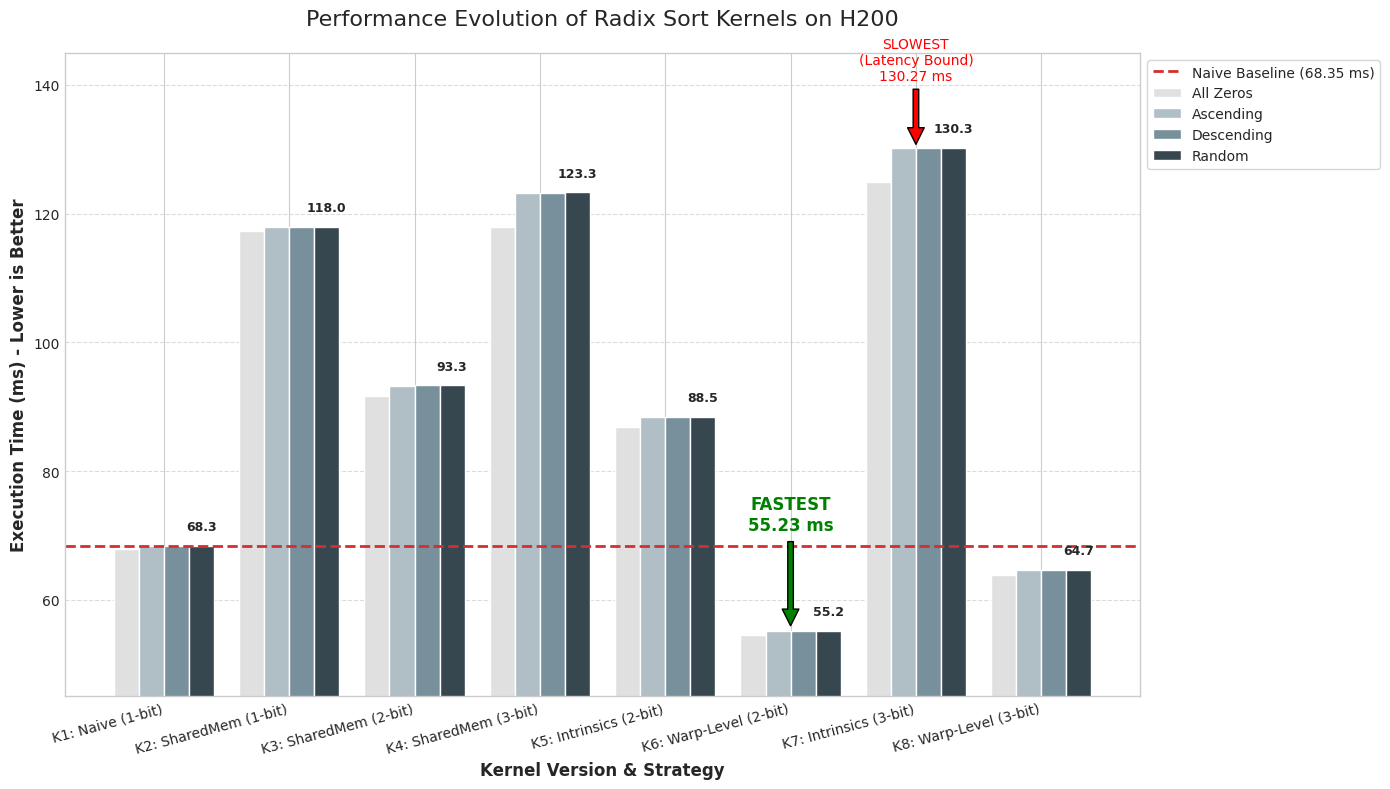

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 数据准备
data = {
    'Kernel': [
        'K1: Naive (1-bit)', 
        'K2: SharedMem (1-bit)', 
        'K3: SharedMem (2-bit)', 
        'K4: SharedMem (3-bit)', 
        'K5: Intrinsics (2-bit)', 
        'K6: Warp-Level (2-bit)', 
        'K7: Intrinsics (3-bit)', 
        'K8: Warp-Level (3-bit)'
    ],
    'Radix': [1, 1, 4, 8, 4, 4, 8, 8],
    'All Zeros': [67.89, 117.32, 91.69, 117.96, 86.91, 54.51, 124.95, 63.81],
    'Ascending': [68.35, 118.00, 93.26, 123.28, 88.44, 55.23, 130.26, 64.64],
    'Descending': [68.35, 118.00, 93.31, 123.29, 88.44, 55.23, 130.26, 64.64],
    'Random': [68.35, 118.00, 93.31, 123.31, 88.45, 55.23, 130.27, 64.65]
}

df = pd.DataFrame(data)

# 设置绘图风格
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-v0_8-whitegrid')

# 设置位置
x = np.arange(len(df['Kernel']))
width = 0.2  # 柱状图宽度

# 绘制柱状图 (4种模式)
# 使用柔和的颜色区分模式
colors = ['#E0E0E0', '#B0BEC5', '#78909C', '#37474F'] 
plt.bar(x - 1.5*width, df['All Zeros'], width, label='All Zeros', color=colors[0], edgecolor='white')
plt.bar(x - 0.5*width, df['Ascending'], width, label='Ascending', color=colors[1], edgecolor='white')
plt.bar(x + 0.5*width, df['Descending'], width, label='Descending', color=colors[2], edgecolor='white')
plt.bar(x + 1.5*width, df['Random'], width, label='Random', color=colors[3], edgecolor='white')

# 设置 Y 轴范围从 45 开始
plt.ylim(45, 145)

# 添加基准线 (Kernel 1 - Random)
baseline = df.loc[0, 'Random']
plt.axhline(y=baseline, color='#D32F2F', linestyle='--', linewidth=2, label=f'Naive Baseline ({baseline:.2f} ms)')

# 突出显示最快的结果 (Kernel 6)
best_time = df['Random'].min()
best_idx = df['Random'].idxmin()
plt.annotate(f'FASTEST\n{best_time:.2f} ms', 
             xy=(best_idx, best_time), 
             xytext=(best_idx, best_time + 15),
             ha='center', va='bottom',
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=12, fontweight='bold', color='green')

# 突出显示"负优化"陷阱 (Kernel 7)
worst_time = df['Random'].max()
worst_idx = df['Random'].idxmax()
plt.annotate(f'SLOWEST\n(Latency Bound)\n{worst_time:.2f} ms', 
             xy=(worst_idx, worst_time), 
             xytext=(worst_idx, worst_time + 10),
             ha='center', va='bottom',
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10, color='red')

# 图表装饰
plt.xlabel('Kernel Version & Strategy', fontsize=12, fontweight='bold')
plt.ylabel('Execution Time (ms) - Lower is Better', fontsize=12, fontweight='bold')
plt.title('Performance Evolution of Radix Sort Kernels on H200', fontsize=16, pad=20)
plt.xticks(x, df['Kernel'], rotation=15, ha='right')
plt.legend(frameon=True, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 在每个 Kernel 上方标注 Random 模式的具体时间
for i, v in enumerate(df['Random']):
    plt.text(i + 1.5*width, v + 2, f'{v:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('radix_sort_benchmark.png', dpi=150)
plt.show()